# Matplotlib使用详解VIII
## 多个子图

有时候，比较不同的数据视图是有帮助的。为此，Matplotlib有*子图的概念*:一组较小的轴，它们可以在一个图形中共存。这些次要视图可能是嵌套、图格或其他更复杂的布局。在本次实验中，我们将探索在Matplotlib中创建子块的四个例程。

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: 手动绘制子图

创建坐标轴的最基本方法是使用``plt.axes``函数。正如我们前面所看到的，默认情况下，这会创建一个标准轴对象来填充整个图形。

``plt.axes``还包含一个可选参数，该参数是图坐标系统中的四个数字的列表。这些数字代表 ``[left, bottom, width, height]``，在图坐标系统中，从图的左下角的0到图的右上方的1。

例如，我们可以在另一个坐标轴的右上角创建一个嵌入的坐标轴，将*x*和*y*位置设置为0.65(即从图的高度的65%开始，到图的高度的65%)和*x*和*y*扩展到0.2(也就是说，轴的尺寸是宽度的20%，高度的20%):

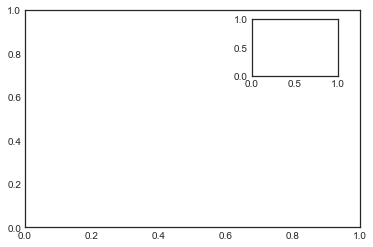

In [2]:
ax1 = plt.axes()  # 标准化的坐标轴
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

在面向对象的接口中，这个命令的等效值是``fig.add_axes()``。让我们用这个来创建两个垂直堆叠的坐标轴:

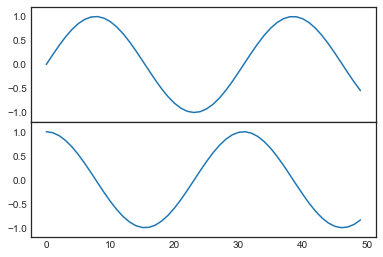

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

我们现在有两个轴(顶部没有刻度标签)，只是触及:上面板的底部(位置0.5)匹配下面板的顶部(位置0.1 + 0.4)。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 1:</h1>
<b>对上文所产生的图像进行参数修改，将正弦和正切的图像一起绘制出来。</b>
</div>

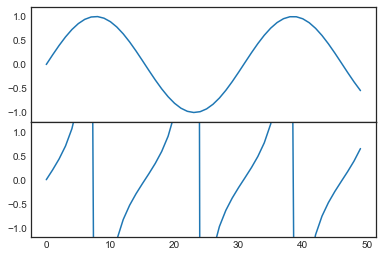

In [4]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig1.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.tan(x))

 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q1" class="collapse">
```
代码：
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig1.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.tan(x))
    


```
</div>



## ``plt.subplot``: 简单网格的子图

对齐的列或子块的行是一个非常普通的需要，Matplotlib有几个方便的例程，使它们易于创建。其中最低级别是 ``plt.subplot()``，它在网格中创建一个单独的子图。正如您所看到的，这个命令使用三个整数参数—行数、列数和在这个scheme中创建的图的索引，从左上角到右下角:

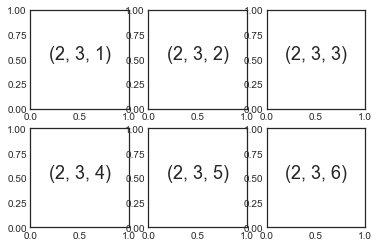

In [5]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

``plt.subplots_adjust``可以用来调整这些块之间的间距。

下面的代码使用了等价的面向对象的命令，``fig.add_subplot()``

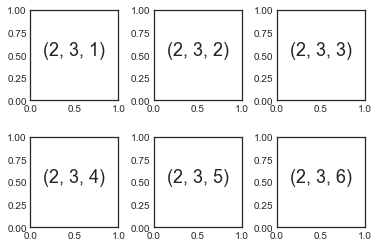

In [6]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

我们已经使用过了``plt.subplots_adjust``函数的``hspace``和``wspace``参数，可以指定图的高度和宽度的间距，在子图的大小单位(在本例中，空间是子图宽度和高度的40%)。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 2:</h1>
<b>对上文所产生的图像进行参数修改，将图中的坐标位置放置在右边。</b>
</div>

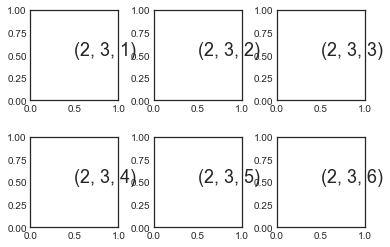

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='left')

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q2" class="collapse">
```
代码：
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='left')
    


```
</div>



## ``plt.subplots``: 作为一个整体的网格
当创建一个大型的子图网格时，所描述的方法可能会变得非常繁琐，特别是如果您想在内部图上隐藏x和y轴的标签。

为此，``plt.subplots()`` 是更容易使用的工具(注意``subplots``尾部的的``s`` )。该函数没有创建一个子图，而是在一行中创建一个完整的子块网格，并将它们返回到一个NumPy数组中。参数是行数和列数，以及可选的关键字``sharex`` 和 ``sharey``，允许您指定不同轴之间的关系。这里我们将创建一个$2 \times 3$的子块网格，其中所有的坐标轴都在相同的列中共享它们的y轴比例，并且同一列中的所有轴都共享它们的x轴比例:

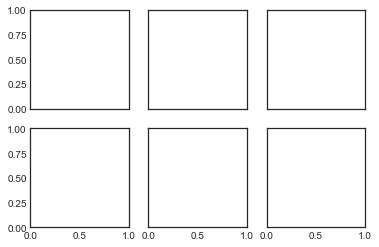

In [8]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

请注意，通过指定``sharex`` and ``sharey``，我们会自动删除网格中的内部标签，以使图更清晰。在NumPy数组中返回得到的轴实例网格，允许使用标准数组索引符号方便地指定所需的轴:

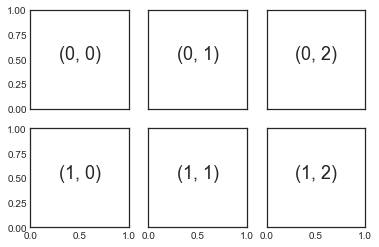

In [9]:
# 数轴是一个二维的数组, 通过[row, col]来索引。
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

相对于``plt.subplot()``, ``plt.subplots()`` 更符合Python的传统的基于0的索引。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 3:</h1>
<b>对上文所产生的图像进行参数修改，绘制一个4行4列的网格图。</b>
</div>

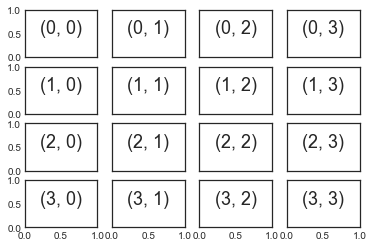

In [10]:
fig, ax = plt.subplots(4, 4, sharex='col', sharey='row')
for i in range(4):
    for j in range(4):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q3" class="collapse">
```
代码：
fig, ax = plt.subplots(4, 4, sharex='col', sharey='row')
for i in range(4):
    for j in range(4):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
    


```
</div>



## ``plt.GridSpec``: 更复杂的排版

要超越一个常规的网格到跨越多个行和列的子块，``plt.GridSpec()``是最好的工具。``plt.GridSpec()``对象本身不会创建一个图；它只是一个方便的接口，被``plt.subplot()``命令识别。例如，一个网格划分为两行和三列，其中指定的宽度和高度空间是这样的:

In [11]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

由此，我们可以使用熟悉的Python切片语法指定子图的位置和延展:

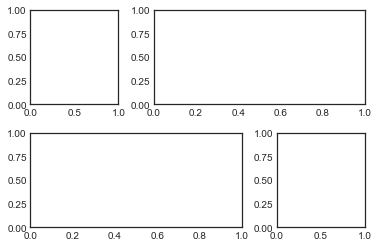

In [12]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

这种类型的柔性网格对齐有广泛的用途。我经常使用它来创建多轴直方图，就像这里显示的那样:

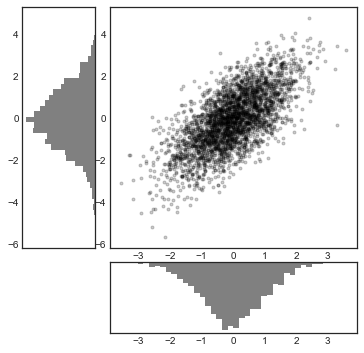

In [8]:
# 创建一些正常分布的数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 4:</h1>
<b>对上文所产生的图像进行参数修改，左边的直方图放置在右边，并将直方图的颜色修改为蓝色。</b>
</div>

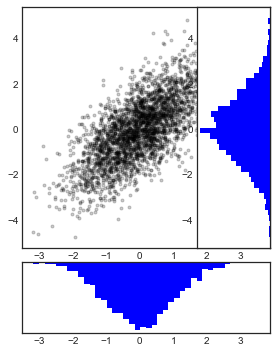

In [14]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 3], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='blue')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='blue')
y_hist.invert_xaxis()

 <div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q4" class="collapse">
```
代码：
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 3], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='blue')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='blue')
y_hist.invert_xaxis()
    

```
</div>

